In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/user/Downloads/한국자산관리공사_국유부동산 매각현황_20211231.csv", encoding='cp949')

In [3]:
df

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
127184,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-112,토지,대,18,3051840,처분(매각수의),2021-12-22,강원지역본부,원주지사
127185,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-113,토지,도로,43,2384250,처분(매각수의),2021-12-22,강원지역본부,원주지사
127186,2021,경기도,경기도 파주시 파평면 눌노리 144-6,토지,잡종지,24,488811,처분(매각수의),2021-12-23,인천지역본부,국유재산3팀
127187,2021,부산광역시,부산광역시 영도구 청학동 73-129,토지,임야,1053,189540,처분(매각수의),2021-12-28,부산지역본부,국유재산관리4팀


In [4]:
df['팀명'].unique()

array(['국유재산관리1팀', '국유울산팀', '국유재산관리2팀', '국유춘천팀', '국유목포팀', '국유여수팀',
       '국유제주팀', '국유팀', '국유광주2팀', '국유원주팀', '국유진주팀', '내포지부', '국유재산관리팀',
       '국유 충주팀', '재산관리3팀', '국유군산팀', '국유재산관리3팀', '국유 안동팀', '국유 포항팀',
       '의정부팀', '재산관리2팀', '국유광주1팀', '국유평택팀', '재산관리1팀', '재산관리5팀', '국유통영팀',
       '재산관리4팀', '재산관리6팀', '팀미정', '국유목포지부', '국유여수지부', '국유제주지부', '포항지부',
       '안동지부', '국유재산1팀', '국유재산3팀', '의정부지부', '국유광주3팀', '국유재산2팀', '울산지부',
       '국유재산관리4팀', '기획관리팀', '원주지부', '국유1팀', '국유2팀', '춘천지부', '국유진주지부',
       '국유통영지부', '국유광주4팀', '국유목포지사', '국유여수지사', '내포지사', '충주지사', '군산지사',
       '국유진주지사', '국유통영지사', '포항지사', '안동지사', '국유제주지사', '울산지사', '국유재산관리5팀',
       '평택지사', '의정부지사', '원주지사', '춘천지사', '해안면무주지국유화지원추진단'], dtype=object)

In [53]:
def chr_change(x):
    if '1팀' in x:
        return '국유1팀'
    if '2팀' in x:
        return '국유2팀'
    if '3팀' in x:
        return '국유3팀'
    if '4팀' in x:
        return '국유4팀'
    if '5팀' in x:
        return '국유5팀'
    
    return x

In [54]:
df['팀명'] = df['팀명'].apply(lambda x: chr_change(x))

In [55]:
df.groupby('팀명').max()

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,대장금액(log2)
팀명,,,,,,,,,,,
국유 안동팀,2016,경상북도,경상북도 청송군 현서면 월정리 882-2,토지,확인불가,21960,595479100,처분(무상관리전환),2016-06-30,대구경북지역본부,29.149476
국유 충주팀,2018,충청북도,충청북도 충주시 호암동 888-41,토지,확인불가,347100,3822190000,처분(무상관리전환),2018-12-03,충북지역본부,31.831752
국유 포항팀,2016,경상북도,경상북도 포항시 북구 흥해읍 학천리 806-92,토지,확인불가,28845,4326750000,처분(무상관리전환),2016-06-30,대구경북지역본부,32.010637
국유1팀,2021,충청북도,충청북도 청주시 흥덕구 옥산면 장남리 284-15,토지,확인불가,797656,221000000000,처분(유상관리전환),2021-12-30,충북지역본부,37.685255
국유2팀,2021,충청북도,충청북도 청주시 흥덕구 화계동 산 31-22,토지,확인불가,967483,54176970170,처분(유상관리전환),2021-12-31,충북지역본부,35.656961
국유3팀,2021,충청남도,충청남도 청양군 청양읍 읍내리 396-8,토지,확인불가,1612459,367000000000,처분(유상관리전환),2021-12-30,전북지역본부,38.416989
국유4팀,2021,전라북도,전라북도 진안군 진안읍 오천리 1398-29,토지,확인불가,114207,15711070000,처분(유상양여),2021-12-30,전북지역본부,33.871062
국유5팀,2021,울산광역시,울산광역시 중구 성안동 238,토지,확인불가,11245,33330000000,처분(사용승인),2021-12-29,서울국유재산부,34.956102
국유군산팀,2018,전라북도,전라북도 익산시 황등면 황등리 산 76-3,토지,확인불가,17780,1029955680,처분(무상관리전환),2018-12-05,전북지역본부,29.939935


In [56]:
df.groupby('팀명').sum().sort_values('대장금액(원)', ascending = False)

,연도구분,대장면적(제곱미터),대장금액(원),대장금액(log2)
팀명,,,,
국유1팀,47936553,11456845,1779953665525,NaN
국유2팀,54970114,16945808,1750355642791,NaN
국유3팀,26105220,6821493,1462689830906,NaN
내포지사,1486621,1997824,262163428722,15820.018521
국유4팀,7903267,1266922,213752904244,NaN
국유재산관리팀,7098709,1815790,198222072825,NaN
재산관리6팀,1650438,101098,165005815365,NaN
국유5팀,2180048,251907,146888102368,25478.972578
국유평택팀,8894798,1391016,116627046395,98937.937609


In [57]:
query_expr = "팀명 == ['국유1팀', '국유2팀', '국유3팀', '내포지사', '국유4팀']"
df_top5 = df.query(query_expr)

<AxesSubplot: xlabel='팀명', ylabel='대장금액(원)'>

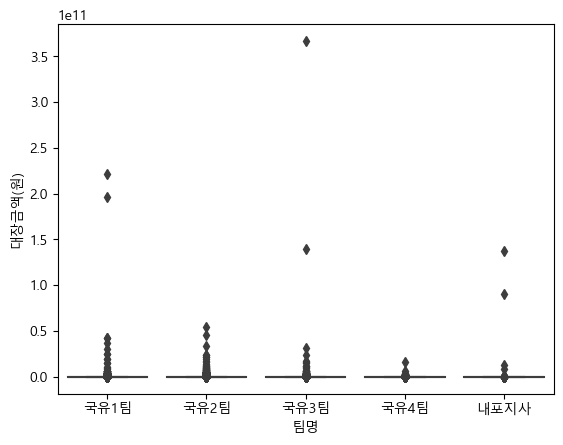

In [24]:
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.boxplot(data = df_top5, x = "팀명", y = "대장금액(원)")

In [71]:
df_top5['대장금액(원)'].apply(lambda x: np.log2(x))

0         23.248873
2         20.036174
3         20.845490
4         24.504325
5         21.721006
            ...    
127182    28.741366
127183    25.154682
127186    18.898917
127187    17.532143
127188    16.167810
Name: 대장금액(원), Length: 68602, dtype: float64

In [74]:
df_top5['대장금액(log2)'] = np.log2(df_top5['대장금액(원)'] + 0.001)

C:\Users\user\AppData\Local\Temp\ipykernel_19236\2898818312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['대장금액(log2)'] = np.log2(df_top5['대장금액(원)'] + 0.001)


In [75]:
df_top5

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,대장금액(log2)
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56,9968000,처분(매각수의),2014-01-01,전북지역본부,국유1팀,23.248873
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105,1075200,처분(매각수의),2014-01-01,전북지역본부,국유1팀,20.036174
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184,1884160,처분(매각수의),2014-01-01,전북지역본부,국유1팀,20.845490
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106,23797800,처분(매각수의),2014-01-01,전북지역본부,국유2팀,24.504325
5,2014,전라북도,전라북도 김제시 검산동 산 60-2,토지,임야,298,3456800,처분(매각수의),2014-01-01,전북지역본부,국유2팀,21.721006
...,...,...,...,...,...,...,...,...,...,...,...,...
127182,2021,경기도,경기도 과천시 주암동 454-3,토지,전,443,448759000,처분(매각수의),2021-12-29,경기지역본부,국유3팀,28.741366
127183,2021,경기도,경기도 과천시 주암동 454-4,토지,전,23,37352000,처분(매각수의),2021-12-29,경기지역본부,국유3팀,25.154682
127186,2021,경기도,경기도 파주시 파평면 눌노리 144-6,토지,잡종지,24,488811,처분(매각수의),2021-12-23,인천지역본부,국유3팀,18.898917
127187,2021,부산광역시,부산광역시 영도구 청학동 73-129,토지,임야,1053,189540,처분(매각수의),2021-12-28,부산지역본부,국유4팀,17.532143


<AxesSubplot: xlabel='팀명', ylabel='대장금액(log2)'>

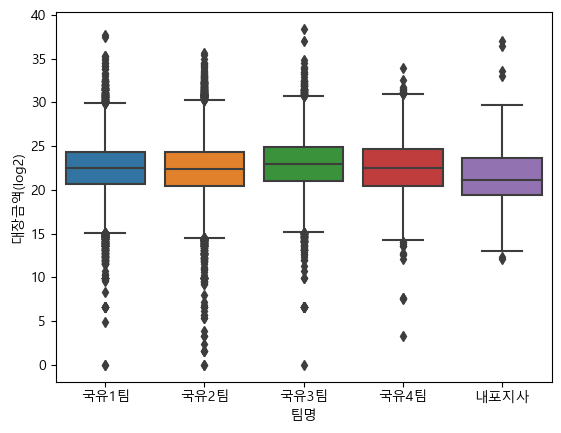

In [30]:
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.boxplot(data = df_top5, x = "팀명", y = "대장금액(log2)")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

국유1팀 v.s. 국유2팀: t-test independent samples with Bonferroni correction, P_val=3.105e-08 stat=5.536e+00


C:\ProgramData\Anaconda3\lib\site-packages\statannot\statannot.py:593: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.draw()


(<AxesSubplot: xlabel='팀명', ylabel='대장금액(log2)'>,
 [<statannot.StatResult.StatResult at 0x19fd7fc1d00>])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


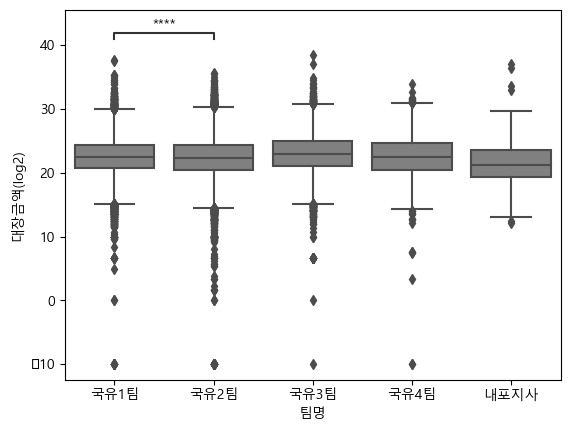

In [77]:
ax1 = plt.subplot()
sns.boxplot(data=df_top5, x='팀명', y='대장금액(log2)', color='0.5', ax = ax1)

add_stat_annotation(ax1,
                   data = df_top5,
                   x = '팀명',
                   y = '대장금액(log2)',
                   test = 't-test_ind',
                    box_pairs=[('국유1팀', '국유2팀')],
                    text_format='star',
                   loc = 'inside')

In [60]:
df_top5

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,대장금액(log2)
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56,9968000,처분(매각수의),2014-01-01,전북지역본부,국유1팀,23.248873
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105,1075200,처분(매각수의),2014-01-01,전북지역본부,국유1팀,20.036174
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184,1884160,처분(매각수의),2014-01-01,전북지역본부,국유1팀,20.845490
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106,23797800,처분(매각수의),2014-01-01,전북지역본부,국유2팀,24.504325
5,2014,전라북도,전라북도 김제시 검산동 산 60-2,토지,임야,298,3456800,처분(매각수의),2014-01-01,전북지역본부,국유2팀,21.721006
...,...,...,...,...,...,...,...,...,...,...,...,...
127182,2021,경기도,경기도 과천시 주암동 454-3,토지,전,443,448759000,처분(매각수의),2021-12-29,경기지역본부,국유3팀,28.741366
127183,2021,경기도,경기도 과천시 주암동 454-4,토지,전,23,37352000,처분(매각수의),2021-12-29,경기지역본부,국유3팀,25.154682
127186,2021,경기도,경기도 파주시 파평면 눌노리 144-6,토지,잡종지,24,488811,처분(매각수의),2021-12-23,인천지역본부,국유3팀,18.898917
127187,2021,부산광역시,부산광역시 영도구 청학동 73-129,토지,임야,1053,189540,처분(매각수의),2021-12-28,부산지역본부,국유4팀,17.532143


In [73]:
df_top5.groupby('팀명').sum().sort_values('대장금액(원)', ascending = False)

,연도구분,대장면적(제곱미터),대장금액(원),대장금액(log2)
팀명,,,,
국유1팀,47936553,11456845,1779953665525,NaN
국유2팀,54970114,16945808,1750355642791,NaN
국유3팀,26105220,6821493,1462689830906,NaN
내포지사,1486621,1997824,262163428722,15820.018521
국유4팀,7903267,1266922,213752904244,NaN


In [63]:
df_top5['팀명'].unique()

array(['국유1팀', '국유2팀', '국유3팀', '국유4팀', '내포지사'], dtype=object)

In [72]:
df_top5.groupby('팀명').sum()
# log 마이너스 발산 값이 있으면 sum에 포함이 안됨. 로그 함수 쓸 때 그 점 조심할 것!

,연도구분,대장면적(제곱미터),대장금액(원),대장금액(log2)
팀명,,,,
국유1팀,47936553,11456845,1779953665525,NaN
국유2팀,54970114,16945808,1750355642791,NaN
국유3팀,26105220,6821493,1462689830906,NaN
국유4팀,7903267,1266922,213752904244,NaN
내포지사,1486621,1997824,262163428722,15820.018521


In [76]:
df_top5.groupby('팀명').sum().sort_values('대장금액(원)', ascending = False)

,연도구분,대장면적(제곱미터),대장금액(원),대장금액(log2)
팀명,,,,
국유1팀,47936553,11456845,1779953665525,534274.336780
국유2팀,54970114,16945808,1750355642791,608471.640253
국유3팀,26105220,6821493,1462689830906,296233.056692
내포지사,1486621,1997824,262163428722,15820.018524
국유4팀,7903267,1266922,213752904244,88248.989029


In [62]:
df_top5['대장금액(log2)'][0] + df_top5['대장금액(log2)'][2] + df_top5['대장금액(log2)'][3]

64.13053630118395

In [61]:
df_top5['대장금액(log2)'][2]

20.036173612553483

In [78]:
df_query = df_top5.groupby('팀명').sum().sort_values('대장금액(원)', ascending = False)

In [79]:
df_query.iloc[:2]

,연도구분,대장면적(제곱미터),대장금액(원),대장금액(log2)
팀명,,,,
국유1팀,47936553,11456845,1779953665525,534274.336780
국유2팀,54970114,16945808,1750355642791,608471.640253


Text(0.4, 1790000000000, 'T-test P-value < 0.001')

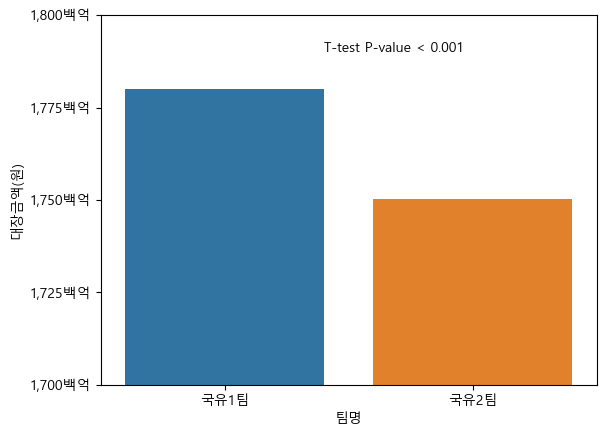

In [95]:
sns.barplot(x = df_query.iloc[:2].index, y = df_query.iloc[:2]['대장금액(원)'])
plt.ylim(1700000000000, 1800000000000)
plt.yticks([1700000000000, 1725000000000, 1750000000000, 1775000000000, 1800000000000],
          ['1,700백억', '1,725백억', '1,750백억', '1,775백억', '1,800백억'])
plt.text(0.4, 1790000000000, 'T-test P-value < 0.001')

In [82]:
df_year = df.groupby('연도구분').sum()

In [83]:
df_year.head()

,대장면적(제곱미터),대장금액(원),대장금액(log2)
연도구분,,,
2014,11729677,836802797181,NaN
2015,11638209,1395759106170,NaN
2016,15732699,579083546456,NaN
2017,8878092,700658462323,504951.376558
2018,5180831,613223822904,307038.625267


In [85]:
df_year = df_year.drop('대장금액(log2)', axis = 1)

In [86]:
df_year

,대장면적(제곱미터),대장금액(원)
연도구분,,
2014,11729677,836802797181
2015,11638209,1395759106170
2016,15732699,579083546456
2017,8878092,700658462323
2018,5180831,613223822904
2019,13087994,771039378713
2020,5210620,746681020674
2021,4588363,1477228187742


<AxesSubplot: xlabel='연도구분', ylabel='대장금액(원)'>

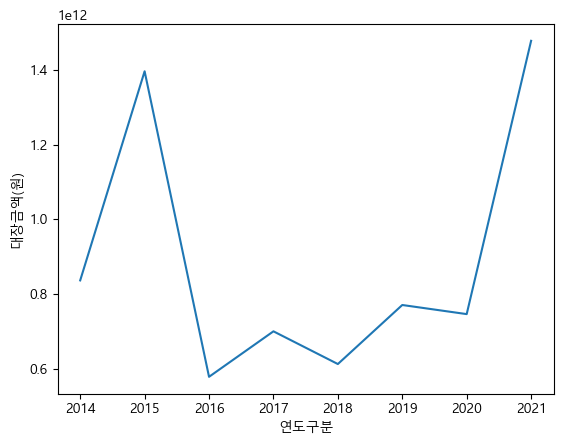

In [87]:
sns.lineplot(data = df_year, x = "연도구분", y = "대장금액(원)")

<AxesSubplot: xlabel='연도구분', ylabel='대장금액(원)'>

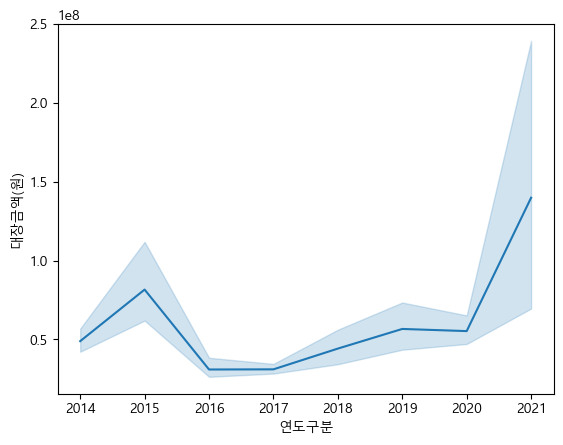

In [88]:
sns.lineplot(data = df, x = "연도구분", y = "대장금액(원)")

<AxesSubplot: xlabel='연도구분', ylabel='대장금액(원)'>

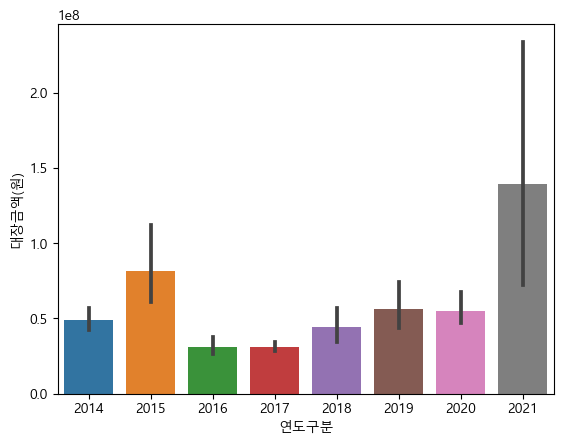

In [96]:
sns.barplot(data = df, x = "연도구분", y = "대장금액(원)")

<AxesSubplot: xlabel='연도구분', ylabel='대장금액(원)'>

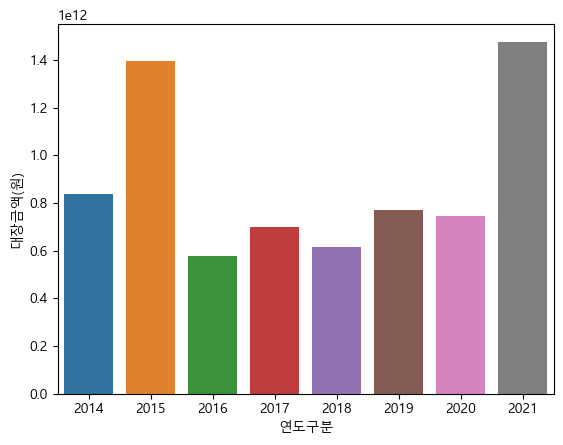

In [104]:
sns.barplot(data = df_year, x = df_year.index, y = "대장금액(원)")

In [108]:
df= df.drop('대장금액(log2)', axis = 1)

In [109]:
df.groupby('지역구분').sum()

,연도구분,대장면적(제곱미터),대장금액(원)
지역구분,,,
강원도,22601350,12873910,251799511259
경기도,48294413,10384133,1741140987417
경상남도,27090021,5783023,270735034572
경상북도,25744258,6709263,217582321150
광주광역시,3643027,1327784,222612429541
대구광역시,5223906,602050,197876802375
대전광역시,2274248,361256,119965664974
부산광역시,18393757,2767956,344751563582
서울특별시,11910231,2948849,2262941451195


In [111]:
df_loc = df.groupby('지역구분').sum().sort_values('대장면적(제곱미터)', ascending = False)

In [112]:
df_loc = df_loc.iloc[:5]

In [137]:
df_loc

,연도구분,대장면적(제곱미터),대장금액(원)
지역구분,,,
강원도,22601350,12873910,251799511259
경기도,48294413,10384133,1741140987417
전라남도,24337999,9090624,122614437554
충청남도,16396854,8023451,444157048198
경상북도,25744258,6709263,217582321150


<AxesSubplot: xlabel='지역구분', ylabel='대장면적(제곱미터)'>

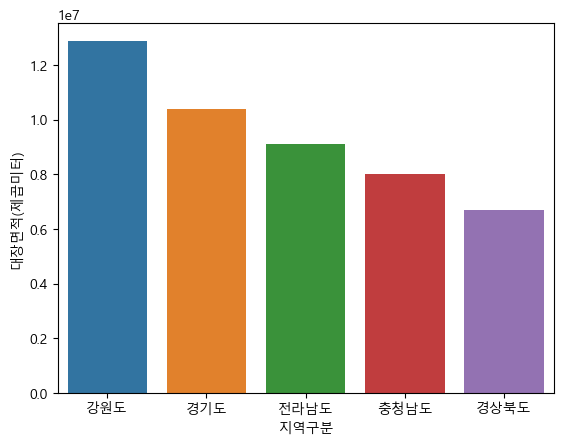

In [114]:
sns.barplot(data = df_loc, x = df_loc.index, y = "대장면적(제곱미터)")

([<matplotlib.patches.Wedge at 0x19fd43192e0>,
 [Text(0.718484902272875, 0.8329342382240854, '강원도'),
  Text(-0.8192360870665204, 0.7340655513289918, '경기도'),
  Text(-0.9267623000060043, -0.5925467401712551, '전라남도'),
  Text(0.15354132502964646, -1.0892314086125778, '충청남도'),
  Text(0.991595192514924, -0.47617116059384684, '경상북도')],
 [Text(0.3919008557852045, 0.4543277663040465, '27%'),
  Text(-0.44685604749082924, 0.40039939163399546, '22%'),
  Text(-0.5055067090941842, -0.32320731282068454, '19%'),
  Text(0.08374981365253442, -0.5941262228795878, '17%'),
  Text(0.5408701050081403, -0.2597297239602801, '14%')])

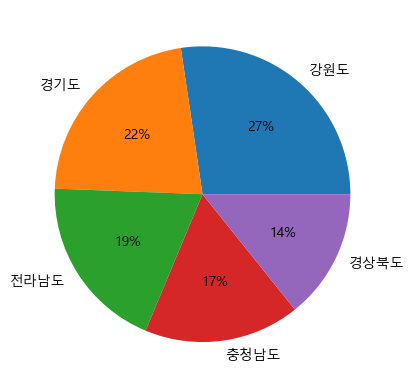

In [115]:
plt.pie(x = df_loc['대장면적(제곱미터)'], labels = df_loc.index, autopct = "%.0f%%")

In [138]:
df_loc2 = df.groupby('지역구분').sum().sort_values('대장면적(제곱미터)', ascending = False)

In [118]:
df_loc2

,연도구분,대장면적(제곱미터),대장금액(원)
지역구분,,,
강원도,22601350,12873910,251799511259
경기도,48294413,10384133,1741140987417
전라남도,24337999,9090624,122614437554
충청남도,16396854,8023451,444157048198
경상북도,25744258,6709263,217582321150
전라북도,24169283,6501851,114451686052
경상남도,27090021,5783023,270735034572
충청북도,12416347,5024722,136566089839
서울특별시,11910231,2948849,2262941451195


([<matplotlib.patches.Wedge at 0x19fd4360a30>,
 [Text(0.9480628383440327, 0.5578322817398224, '강원도'),
  Text(0.08585777965305481, 1.0966441727712084, '경기도'),
  Text(-0.7306001040534488, 0.8223280902152681, '전라남도'),
  Text(-1.0896345650640302, 0.15065362464183107, '충청남도'),
  Text(-0.9801063723988802, -0.4993911280580661, '경상북도'),
  Text(-0.5785015021596839, -0.9355939354223013, '전라북도'),
  Text(-0.050888657377694275, -1.0988222533923746, '경상남도'),
  Text(0.428567841430319, -1.0130792690069998, '충청북도'),
  Text(0.7332327403519545, -0.8199815537412798, '서울특별시'),
  Text(0.9047387318297034, -0.6256579154195847, '부산광역시'),
  Text(1.0030133670897352, -0.45162394250007637, '인천광역시'),
  Text(1.0506664305156814, -0.3257300289924725, '광주광역시'),
  Text(1.0770937936609246, -0.22331359039950452, '제주특별자치도'),
  Text(1.0903331237301412, -0.1455117840481404, '울산광역시'),
  Text(1.0967084589496818, -0.0850326764733096, '대구광역시'),
  Text(1.0992231835140023, -0.04133270890399025, '대전광역시'),
  Text(1.0999293966309203,

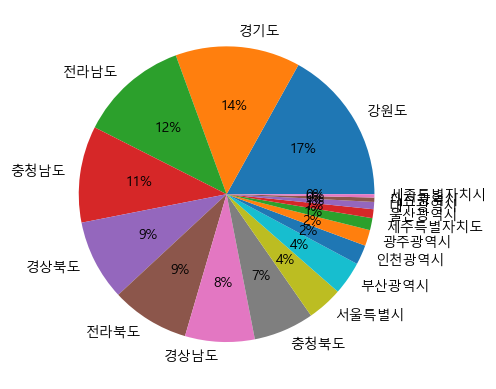

In [119]:
plt.pie(x = df_loc2['대장면적(제곱미터)'], labels = df_loc2.index, autopct = "%.0f%%")

In [123]:
new_ind = []

for i in df_loc2.index:
    x = df_loc2.loc[i, '대장면적(제곱미터)']
    if x / df_loc2['대장면적(제곱미터)'].sum() >= 0.05:
        new_ind.append(i)
    else:
        new_ind.append('기타')

In [124]:
new_ind

['강원도',
 '경기도',
 '전라남도',
 '충청남도',
 '경상북도',
 '전라북도',
 '경상남도',
 '충청북도',
 '기타',
 '기타',
 '기타',
 '기타',
 '기타',
 '기타',
 '기타',
 '기타',
 '기타']

In [127]:
df_loc2.index = df_loc2['지역구분']

In [129]:
temp = df_loc2.loc['기타'].sum()

In [130]:
df_loc2 = df_loc2.iloc[:7]

In [131]:
df_loc2.loc['기타'] = temp

C:\Users\user\AppData\Local\Temp\ipykernel_19236\77885116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc2.loc['기타'] = temp


In [133]:
df_loc2 = df_loc2.drop('지역구분', axis = 1)

In [134]:
df_loc2

,연도구분,대장면적(제곱미터),대장금액(원)
지역구분,,,
강원도,22601350,12873910,251799511259
경기도,48294413,10384133,1741140987417
전라남도,24337999,9090624,122614437554
충청남도,16396854,8023451,444157048198
경상북도,25744258,6709263,217582321150
전라북도,24169283,6501851,114451686052
경상남도,27090021,5783023,270735034572
기타,55509265,11655508,3821429206122


([<matplotlib.patches.Wedge at 0x19fd5862a60>,
 [Text(0.9264071007433957, 0.5931019167834615, '강원도'),
  Text(-0.03021592462731429, 1.0995849207309623, '경기도'),
  Text(-0.8540328926186884, 0.6932732638183562, '전라남도'),
  Text(-1.0968949407478952, -0.08259230570502198, '충청남도'),
  Text(-0.822002287095936, -0.7309666476721428, '경상북도'),
  Text(-0.28232956456579755, -1.0631509850308598, '전라북도'),
  Text(0.30805229178392146, -1.0559847468248174, '경상남도'),
  Text(0.9570114623508922, -0.5423366675129085, '기타')],
 [Text(0.5053129640418522, 0.32351013642734255, '18%'),
  Text(-0.01648141343308052, 0.5997735931259793, '15%'),
  Text(-0.4658361232465572, 0.3781490529918306, '13%'),
  Text(-0.5983063313170336, -0.045050348566375624, '11%'),
  Text(-0.4483648838705105, -0.3987090805484415, '9%'),
  Text(-0.15399794430861682, -0.5799005372895598, '9%'),
  Text(0.16802852279122987, -0.575991680086264, '8%'),
  Text(0.5220062521913956, -0.29582000046158646, '16%')])

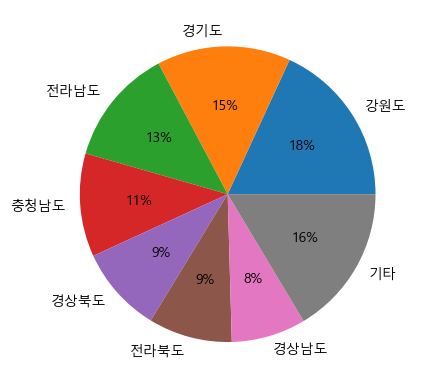

In [136]:
plt.pie(x = df_loc2['대장면적(제곱미터)'], labels = df_loc2.index, autopct = "%.0f%%")

In [146]:
df_count = df.value_counts('계약일자').sort_values(ascending = False)

In [147]:
df_count

계약일자
2017-12-01    600
2016-11-30    504
2020-04-01    442
2019-08-29    432
2017-10-27    415
             ... 
2014-01-04      1
2019-09-07      1
2014-12-13      1
2020-05-24      1
2020-04-18      1
Length: 2486, dtype: int64

<AxesSubplot: xlabel='계약일자'>

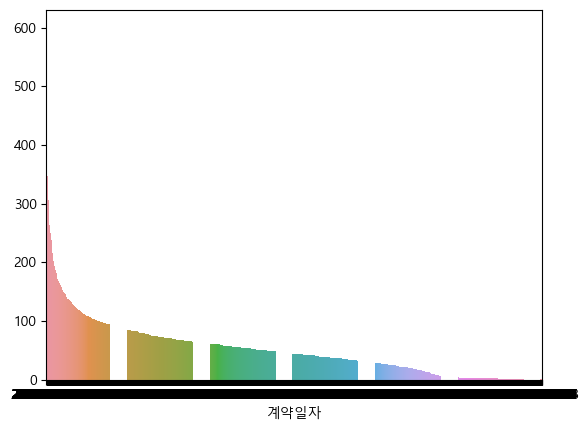

In [150]:
sns.barplot(data = df, x = df_count.index, y = df_count )

In [151]:
df_count2 = df_count[:25]

In [153]:
df_count2

계약일자
2017-12-01    600
2016-11-30    504
2020-04-01    442
2019-08-29    432
2017-10-27    415
2019-02-26    377
2019-01-21    347
2016-11-10    342
2016-09-01    342
2014-01-20    340
2018-07-11    307
2017-04-21    306
2019-06-26    292
2021-07-30    290
2014-10-31    270
2017-12-13    264
2019-11-22    263
2017-06-22    260
2020-05-27    256
2019-12-31    254
2015-08-31    252
2017-12-28    249
2015-05-08    249
2017-09-28    241
2017-10-30    240
dtype: int64

In [155]:
df_count2.index

Index(['2017-12-01', '2016-11-30', '2020-04-01', '2019-08-29', '2017-10-27',
       '2019-02-26', '2019-01-21', '2016-11-10', '2016-09-01', '2014-01-20',
       '2018-07-11', '2017-04-21', '2019-06-26', '2021-07-30', '2014-10-31',
       '2017-12-13', '2019-11-22', '2017-06-22', '2020-05-27', '2019-12-31',
       '2015-08-31', '2017-12-28', '2015-05-08', '2017-09-28', '2017-10-30'],
      dtype='object', name='계약일자')

<AxesSubplot: >

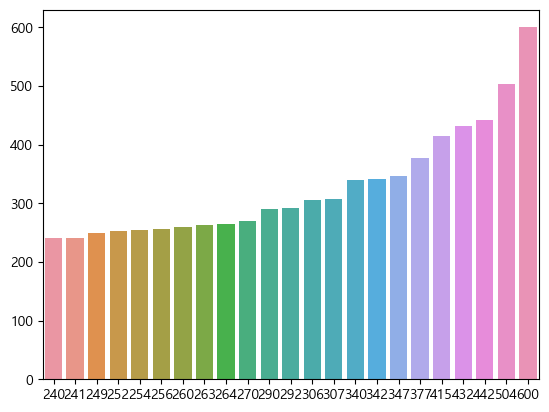

In [157]:
sns.barplot(data = df_count2, x = df_count2.index, y = df_count2 )

<AxesSubplot: xlabel='계약일자'>

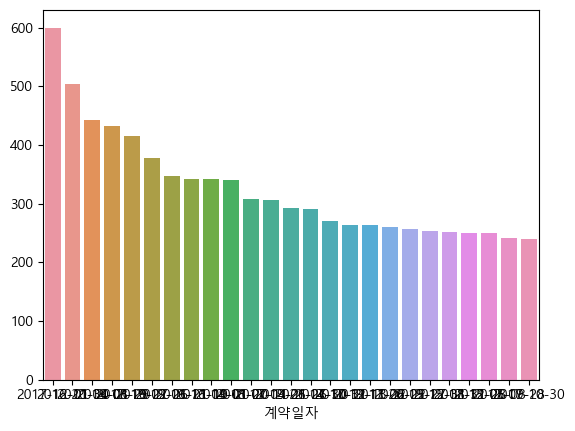

In [158]:
sns.barplot(x = df_count2.index, y = df_count2 ) # 위에랑 아래가 뭐가 다른건데??

<AxesSubplot: xlabel='계약일자'>

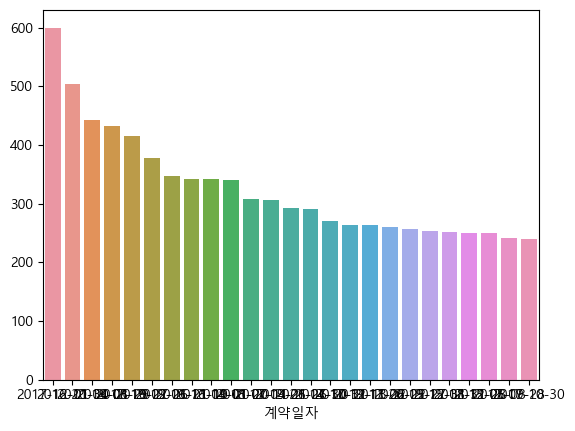

In [159]:
sns.barplot(data = df, x = df_count2.index, y = df_count2 )

Text(0.5, 1.0, '일자별 매각 빈도')

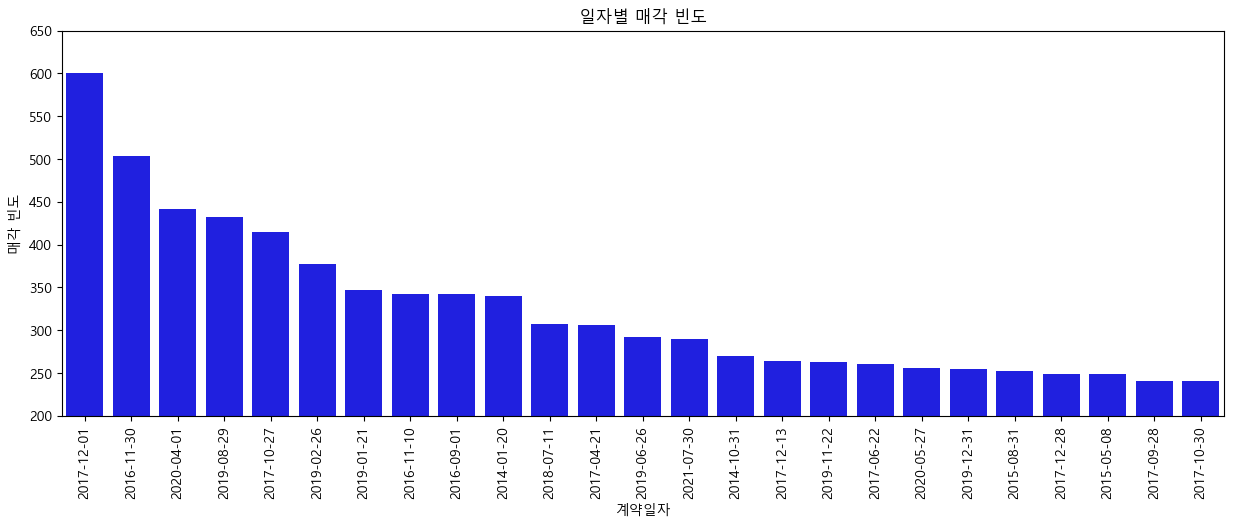

In [177]:
plt.figure(figsize=(15,5))
plt.xticks(rotation = 90)
sns.barplot(x = df_count2.index, y = df_count2, color = 'b' )
plt.ylabel('매각 빈도')
plt.ylim(200, 650)
plt.title('일자별 매각 빈도')

In [162]:
df.groupby('계약일자').count()

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,부점명,팀명
계약일자,,,,,,,,,,
2000-04-19,4,4,4,4,4,4,4,4,4,4
2001-12-20,1,1,1,1,1,1,1,1,1,1
2001-12-21,1,1,1,1,1,1,1,1,1,1
2002-05-16,2,2,2,2,2,2,2,2,2,2
2005-09-01,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,63,63,63,63,63,63,63,63,63,63
2021-12-28,32,32,32,32,32,32,32,32,32,32
2021-12-29,138,138,138,138,138,138,138,138,138,138


In [179]:
df_query = "계약일자 == ['2017-12-01', '2016-11-30']"
df_search = df.query(df_query)

In [180]:
df_search

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
44211,2016,부산광역시,부산광역시 기장군 철마면 웅천리 879-31,토지,답,99,3732300,처분(매각수의),2016-11-30,국유재산관리부,국유2팀
44212,2016,부산광역시,부산광역시 기장군 철마면 웅천리 879-32,토지,답,605,22808500,처분(매각수의),2016-11-30,국유재산관리부,국유2팀
44239,2016,울산광역시,울산광역시 남구 여천동 1345-1,토지,도로,559,8755350,처분(매각수의),2016-11-30,국유재산관리부,국유울산팀
44240,2016,울산광역시,울산광역시 남구 여천동 1357-1,토지,도로,66,14826900,처분(매각수의),2016-11-30,국유재산관리부,국유울산팀
44255,2016,울산광역시,울산광역시 북구 신천동 745-31,토지,답,165,64350000,처분(매각수의),2016-11-30,국유재산관리부,국유울산팀
...,...,...,...,...,...,...,...,...,...,...,...
75281,2017,경상남도,경상남도 합천군 합천읍 합천리 82-42,토지,전,61,1079700,처분(무상관리전환),2017-12-01,경남지역본부,국유진주팀
75283,2017,경상남도,경상남도 합천군 합천읍 합천리 96-16,토지,전,13,230100,처분(무상관리전환),2017-12-01,경남지역본부,국유진주팀
75284,2017,경상남도,경상남도 합천군 합천읍 합천리 82-37,토지,제방,424,8459850,처분(무상관리전환),2017-12-01,경남지역본부,국유진주팀
75285,2017,경상남도,경상남도 합천군 합천읍 합천리 82-43,토지,하천,175,2730000,처분(무상관리전환),2017-12-01,경남지역본부,국유진주팀


In [182]:
pd.set_option('display.max_rows', 50) # 보여줄 row 갯수 설정

In [183]:
df_search

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
44211,2016,부산광역시,부산광역시 기장군 철마면 웅천리 879-31,토지,답,99,3732300,처분(매각수의),2016-11-30,국유재산관리부,국유2팀
44212,2016,부산광역시,부산광역시 기장군 철마면 웅천리 879-32,토지,답,605,22808500,처분(매각수의),2016-11-30,국유재산관리부,국유2팀
44239,2016,울산광역시,울산광역시 남구 여천동 1345-1,토지,도로,559,8755350,처분(매각수의),2016-11-30,국유재산관리부,국유울산팀
44240,2016,울산광역시,울산광역시 남구 여천동 1357-1,토지,도로,66,14826900,처분(매각수의),2016-11-30,국유재산관리부,국유울산팀
44255,2016,울산광역시,울산광역시 북구 신천동 745-31,토지,답,165,64350000,처분(매각수의),2016-11-30,국유재산관리부,국유울산팀
...,...,...,...,...,...,...,...,...,...,...,...
75281,2017,경상남도,경상남도 합천군 합천읍 합천리 82-42,토지,전,61,1079700,처분(무상관리전환),2017-12-01,경남지역본부,국유진주팀
75283,2017,경상남도,경상남도 합천군 합천읍 합천리 96-16,토지,전,13,230100,처분(무상관리전환),2017-12-01,경남지역본부,국유진주팀
75284,2017,경상남도,경상남도 합천군 합천읍 합천리 82-37,토지,제방,424,8459850,처분(무상관리전환),2017-12-01,경남지역본부,국유진주팀
75285,2017,경상남도,경상남도 합천군 합천읍 합천리 82-43,토지,하천,175,2730000,처분(무상관리전환),2017-12-01,경남지역본부,국유진주팀


In [181]:
df_search.value_counts('지역구분')

지역구분
부산광역시      530
경상북도       462
경기도         27
전라남도        19
경상남도        18
충청남도        10
충청북도         8
서울특별시        7
전라북도         7
강원도          5
울산광역시        4
제주특별자치도      3
인천광역시        2
대구광역시        1
세종특별자치시      1
dtype: int64

In [185]:
pd.DataFrame(df_search.value_counts()) # 연도구분으로 합쳐서 나옴

0
연도구분 지역구분  소재지명                    재산구분 공부지목 대장면적(제곱미터) 대장금액(원)   처분구분명      계약일자       부점명      팀명        
2016 경기도   경기도 가평군 조종면 운악리 235-1   토지   답    893        12502000  처분(매각수의)   2016-11-30 서울국유재산부  국유3팀     1
2017 부산광역시 부산광역시 강서구 대저2동  3585-2  토지   답    1206       116982000 처분(매각수의)   2017-12-01 부산지역본부   국유1팀     1
           부산광역시 강서구 대저2동  3622-11 토지   전    40         3968000   처분(매각수의)   2017-12-01 부산지역본부   국유1팀     1
           부산광역시 강서구 대저2동  3622-10 토지   전    22         2182400   처분(매각수의)   2017-12-01 부산지역본부   국유1팀     1
           부산광역시 강서구 대저2동  3612-14 토지   답    1660       161020000 처분(매각수의)   2017-12-01 부산지역본부   국유1팀     1
...                                                                                                      ..
2016 경상북도  경상북도 영주시 평은면 금광리 670-4  토지   도로   1961       59922048  처분(무상관리전환) 2016-11-30 대구경북지역본부 안동지부     1
           경상북도 영주시 평은면 금광리 672-3  토지   도로   568        17348912  처분(무상관리전환) 2016-11-30 대구경북지역본부 안동지부     1
           경상북도 영주시 평은면 용혈리 1280   토지   구거   717        12432780  처분(무상관리전환) 2016-11-30 대구경북지역본부 안동지부     1
           경상북도 영주시 평은면 용혈리 1284   토지   구거   177        3069180   처분(무상관리전환) 2016-11-30 대구경북지역본부 안동지부     1
2017 충청북도  충청북도 진천군 초평면 진암리 567-22 토지   대    169        1086670   처분(매각수의)   2017-12-01 충북지역본부   국유재산관리팀  1

[1104 rows x 1 columns]